In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [3]:
real_data = pd.read_csv('./files/Week02_iris_w_missing.csv')

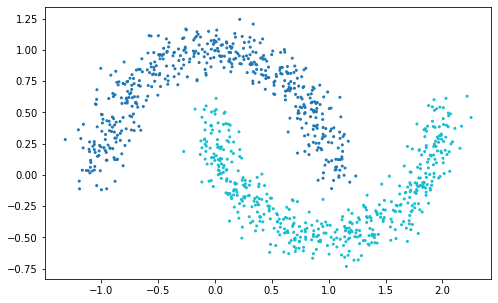

In [4]:
X, y = make_moons(n_samples = 1000, noise = .1) #noise = .0인 경우 선으로 나옴
toy_data = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], 1),
    columns = ['x1', 'x2', 'y']
)

fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(data = toy_data, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)

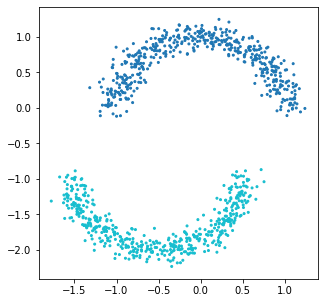

In [5]:
divided_toy_data = toy_data.copy()

divided_toy_data.loc[divided_toy_data['y'] == 1., ['x1', 'x2']] -= 1.5

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(data = divided_toy_data, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)

In [6]:
def gaussian_bayes_parameters(df, n_cis):
    GB_params = dict()
    for n in range(n_cis):
        class_df = df.loc[df['y'] == n, df.columns[: -1]]
        GB_params[n] = np.array([class_df.mean().values, class_df.std().values])
    return GB_params

In [7]:
def class_prop(data, bayes_params, class_numb):
    class_mean = bayes_params[class_numb][0]
    class_std = bayes_params[class_numb][1]
    return np.prod(
        np.exp(
            -1 * (
                (data - class_mean) ** 2 / (2 * class_std ** 2)
            )
        ), axis = 1
    )

C:\Users\keb20\AppData\Local\Temp/ipykernel_23960/1673327019.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


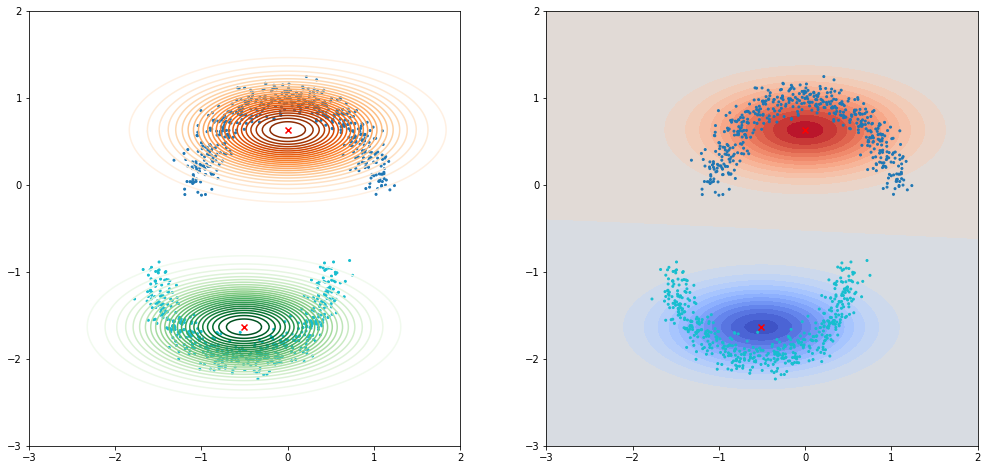

In [8]:
priors = [.5, .5]

bayes_params = gaussian_bayes_parameters(divided_toy_data, len(priors))

plot_x = np.linspace(-3, 2, 201)
plot_y = np.linspace(-3, 2, 201)
plot_xx, plot_yy = np.meshgrid(plot_x, plot_y)

plot_fields = np.array([plot_xx.reshape(-1), plot_yy.reshape(-1)]).transpose()

props = []
for n, p in enumerate(priors):
    props.append(p * class_prop(plot_fields, bayes_params, n).reshape(-1, 201))

fig, ax = plt.subplots(1, 2, figsize = (17, 8))

ax[0].scatter(*bayes_params[0][0], color =  'red', marker = 'x')
ax[0].scatter(*bayes_params[1][0], color = 'red', marker = 'x')

for p, cmap in zip(props, ['Oranges', 'Greens']):
    ax[0].contour(plot_x, plot_y, p, cmap = cmap, levels = 25)

ax[0].scatter(data = divided_toy_data, x = 'x1', y = 'x2', c = 'y', cmap='tab10', s = 4)

ax[1].contourf(plot_x, plot_y, props[0] - props[1], cmap = 'coolwarm', levels = 25)
ax[1].scatter(*bayes_params[0][0], color = 'red', marker = 'x')
ax[1].scatter(*bayes_params[1][0], color = 'red', marker = 'x')
ax[1].scatter(data = divided_toy_data, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)

fig.show()

[0.5, 0.5]
[0.7, 0.3]
[0.9, 0.09999999999999998]


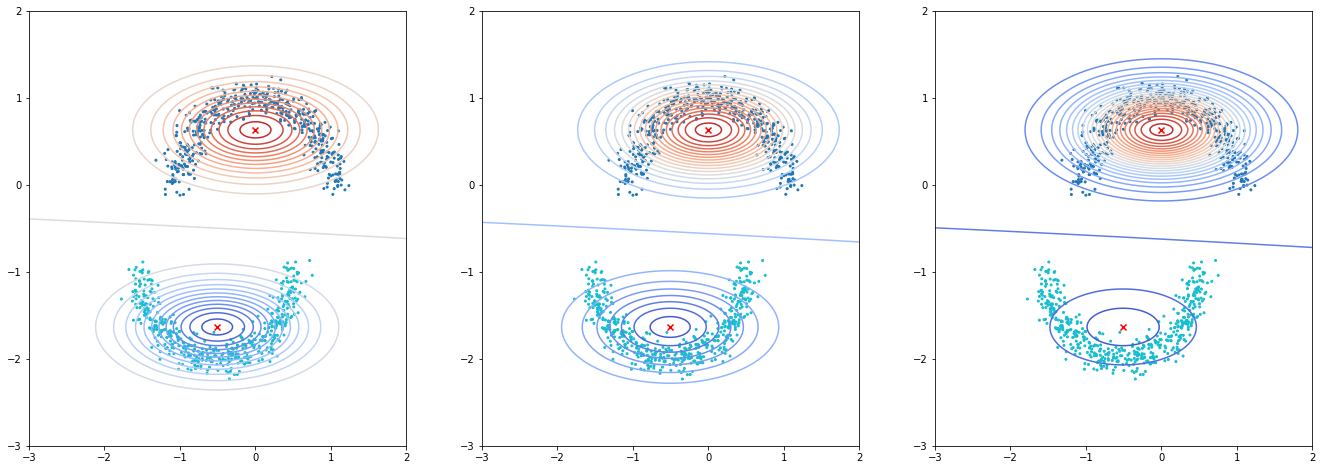

In [9]:
def dif_plot(dataset, priors, ax):
    bayes_params = gaussian_bayes_parameters(dataset, len(priors))

    plot_x = np.linspace(-3, 2, 201)
    plot_y = np.linspace(-3, 2, 201)
    plot_xx, plot_yy = np.meshgrid(plot_x, plot_y)

    plot_fields = np.array([plot_xx.reshape(-1), plot_yy.reshape(-1)]).transpose()

    props = []
    for n, p in enumerate(priors):
        props.append(p * class_prop(plot_fields, bayes_params, n).reshape(-1, 201))
    
    ax.scatter(*bayes_params[0][0], color = 'red', marker = 'x')
    ax.scatter(*bayes_params[1][0], color = 'red', marker = 'x')
    ax.contour(plot_x, plot_y, props[0] - props[1], cmap = 'coolwarm', levels = 25)
    ax.scatter(data = dataset, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)

fig, ax = plt.subplots(1, 3, figsize = (23, 8))
for n, p in enumerate(np.arange(.5, 0, -.2)):
    print([1-p, p])
    dif_plot(divided_toy_data, [1-p, p], ax[n])

In [10]:
def dif_plot(dataset, priors, ax):
    bayes_params = gaussian_bayes_parameters(dataset, len(priors))

    plot_x = np.linspace(dataset.iloc[:, 0].min() - .5, dataset.iloc[:, 0].max() + .5, 201)
    plot_y = np.linspace(dataset.iloc[:, 1].min() - .5, dataset.iloc[:, 1].max() + .5, 201)
    plot_xx, plot_yy = np.meshgrid(plot_x, plot_y)

    plot_fields = np.array([plot_xx.reshape(-1), plot_yy.reshape(-1)]).transpose()

    props = []
    real_props = []
    for n, p in enumerate(priors):
        props.append(p * class_prop(plot_fields, bayes_params, n).reshape(-1, 201))
        real_props.append(p * class_prop(dataset.iloc[:, :len(priors)], bayes_params, n))
    
    ax.scatter(*bayes_params[0][0], color = 'red', marker = 'x')
    ax.scatter(*bayes_params[1][0], color = 'red', marker = 'x')

    ax.contour(plot_x, plot_y, props[0] - props[1], cmap = 'coolwarm', levels = 25)
    
    copy_dataset = dataset.copy()

    copy_dataset['prop'] = real_props[0] - real_props[1]
    copy_dataset['prop'] = copy_dataset['prop'].apply(lambda x : 1 if x > 0 else 0)
    copy_dataset['prop'] = copy_dataset.apply(lambda x : .5 if x['prop'] == x['y'] else x['prop'], axis = 1)

    ax.scatter(data = copy_dataset, x = 'x1', y = 'x2', c = 'prop', cmap = 'tab10', s = 4)
    ax.set_title('Prior : {: .4g} vs {: .4g}'.format(*priors))

[0.5, 0.5]
[0.7, 0.3]
[0.9, 0.09999999999999998]


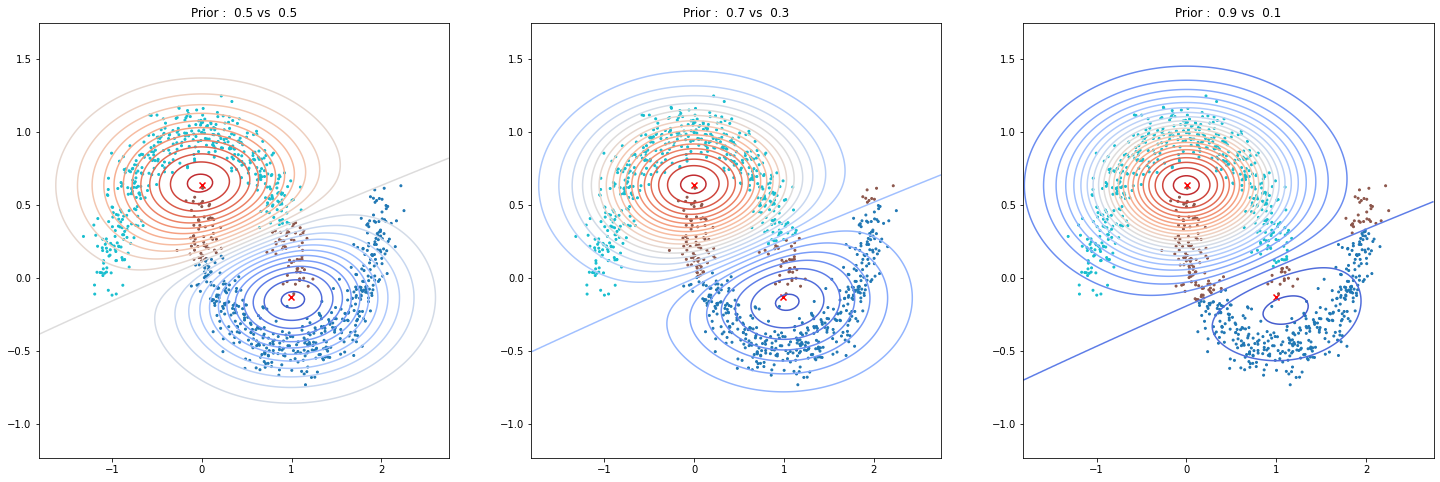

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (25, 8))
for n, p in enumerate(np.arange(.5, 0, -.2)):
    print([1-p, p])
    dif_plot(toy_data, [1-p, p], ax[n])

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.naive_bayes import GaussianNB as GNB

dropped_real_data = real_data.dropna(axis = 0)
model = GNB()
model.fit(
    dropped_real_data.drop(columns = 'target'),
    dropped_real_data['target']
)

print('Prior: ')
print(model.priors)
print('Average: ')
print(model.theta_)
print('Variance: ')
print(model.var_) # var_ vs sigma_

Prior: 
None
Average: 
[[4.95714286 3.39285714 1.45       0.2452381 ]
 [5.91315789 2.76052632 4.24473684 1.32631579]
 [6.55238095 2.94761905 5.51904762 2.02857143]]
Variance: 
[[0.1167347  0.13066327 0.03202381 0.01152495]
 [0.25114266 0.1023892  0.20668283 0.03404432]
 [0.379161   0.0943991  0.27773243 0.07061225]]


In [16]:
for t, sdf in dropped_real_data.groupby('target'):
    print(t)
    print(sdf.iloc[:, :-1].mean().values)
    print(sdf.iloc[:, :-1].var().values)

setosa
[4.95714286 3.39285714 1.45       0.2452381 ]
[0.11958188 0.13385017 0.03280488 0.01180604]
versicolor
[5.91315789 2.76052632 4.24473684 1.32631579]
[0.2579303  0.10515647 0.21226885 0.03496444]
virginica
[6.55238095 2.94761905 5.51904762 2.02857143]
[0.38840883 0.09670151 0.28450639 0.07233449]


In [17]:
logits = model.predict_proba(dropped_real_data.drop(columns = 'target'))

In [18]:
logits

array([[1.00000000e+000, 9.78058584e-020, 4.04359568e-027],
       [1.00000000e+000, 8.28218618e-019, 1.41983820e-026],
       [1.00000000e+000, 4.95194012e-020, 1.03880509e-027],
       [1.00000000e+000, 7.87805140e-019, 1.73507041e-026],
       [1.00000000e+000, 3.34135185e-020, 1.49704714e-027],
       [1.00000000e+000, 4.09652609e-015, 1.63202467e-022],
       [1.00000000e+000, 8.60697242e-019, 1.42916940e-026],
       [1.00000000e+000, 4.64789814e-019, 1.77236928e-026],
       [1.00000000e+000, 4.21574977e-019, 6.05853503e-027],
       [1.00000000e+000, 1.33949635e-019, 6.77562528e-027],
       [1.00000000e+000, 4.28990205e-020, 1.58706306e-027],
       [1.00000000e+000, 1.37103465e-021, 4.18989695e-029],
       [1.00000000e+000, 3.15431217e-020, 4.06760946e-027],
       [1.00000000e+000, 2.40622846e-018, 5.23126684e-026],
       [1.00000000e+000, 1.35656500e-015, 1.13475447e-022],
       [1.00000000e+000, 1.23922527e-018, 4.38408060e-026],
       [1.00000000e+000, 1.08236662e-016